# Task 1: Predict The Percentage Of Student Based On Study Hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data[['Hours','Scores']] = min_max_scaler.fit_transform(data[['Hours','Scores']])

In [3]:
print("Shape of data is {}".format(data.shape))
data.isnull().sum()

Shape of data is (25, 2)


Hours     0
Scores    0
dtype: int64

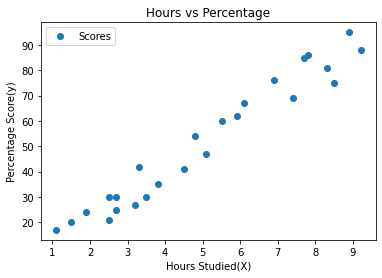

In [4]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied(X)')
plt.ylabel('Percentage Score(y)')  
plt.show()

We can see in graph that appling simple 'Linear regression algorithm will do our Job'

### Preparing data

In [5]:
X_data = data.loc[:,['Hours']].values
y_data = data.loc[:,'Scores'].values

#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

### Training Algorithm

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

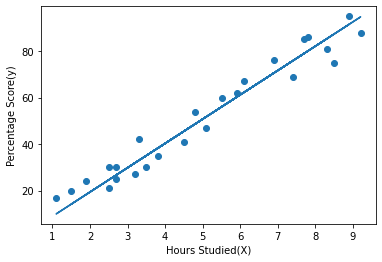

In [7]:
line = regressor.coef_*X_data+regressor.intercept_ 

plt.scatter(X_data, y_data)
plt.plot(X_data, line);
plt.xlabel('Hours Studied(X)')
plt.ylabel('Percentage Score(y)')
plt.show()

### Testing Data

In [8]:
print('Test data for input features {}'.format(X_test))
print('Test data for Output {}'.format(y_test))

Test data for input features [[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]
Test data for Output [17 42 24 75 54]


In [9]:
y_pred = regressor.predict(X_test)
y = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [10]:
#my own data prediction
hours = np.array([[9.1],[5.1],[8.7]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[9.1]
 [5.1]
 [8.7]]
Predicted Score = [93.65912814 51.81469497 89.47468482]
